<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-David-Nicolas364/blob/main/Sep8/Ejercicio_y_tarea_8sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Método del gradiente descendiente usando las librerías scikit-learn y keras.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
#Se cargan los datos
houses=np.loadtxt("/content/drive/MyDrive/Cosas ML/houses.txt",delimiter=',')
#A diferencia del creado por nosortros, está toma las filas en vez de las columnas
Xh=houses[:,:4]
th=houses[:,4] #Costo de la Casa"
labels=["Tamaño","# habitaciones","pisos","Años"]

In [3]:
Xh.shape

(100, 4)

In [4]:
#Normalización
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)

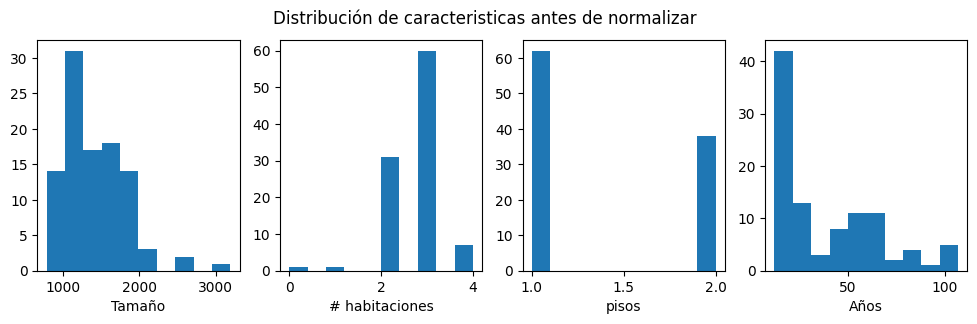

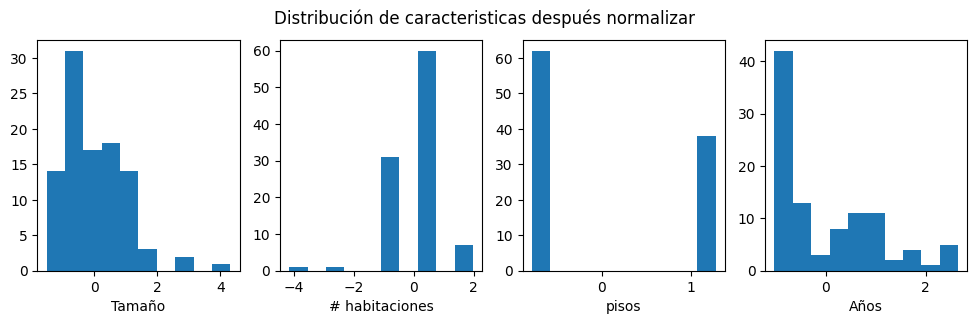

In [5]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas antes de normalizar ")
plt.show()

fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh_norm[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle("Distribución de caracteristicas después normalizar ")
plt.show()

In [8]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, th)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant')
number of iterations completed: 30, number of weight updates: 3001.0


In [9]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [361.67512294], b:[110.38529386 -22.65412645 -33.08347391 -37.22102383]


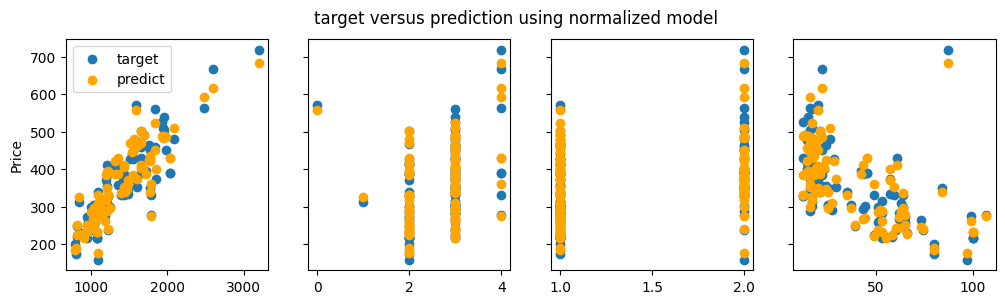

In [10]:
#Predecir el objetivo usando valores normalizados
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i]

    # graficar predicciones y objetivos cotnra valores originales
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'target')
    ax[i].scatter(Xh[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()

In [11]:
#Usando librerias

In [12]:
#Separar en muestras de entrnamiento y de prueba

In [13]:
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

In [14]:
#REsolver usando el Scikit

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 23, number of weight updates: 1611.0


In [15]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [361.83068872], b:[110.04759256 -22.03064418 -34.79228201 -38.96499497]


In [16]:
#Test score
sgdr.score(X_test,y_test)

0.9627590603834258

In [16]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

In [18]:
input_dim = 4
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
num_epochs = 100
batch_size =X_train.shape[0] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 1s 750ms/step - loss: 140519.5156
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 134923.3125
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 129556.4609
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 124409.3125
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 119472.6562
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 114737.6562
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 110195.9062
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 105839.2969
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 101660.1328
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 97651.0156
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 93804.8828
Epoch 12/100
1/1 [==============================] - 0s 15ms/step - loss: 90

In [20]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 58.853924 ]
 [  0.5878285]
 [-14.80698  ]
 [-49.819416 ]] [312.56403]


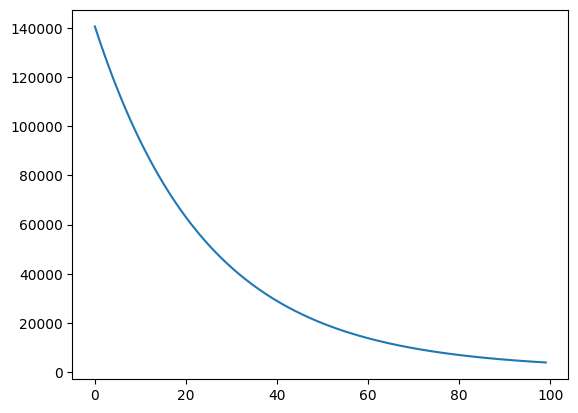

In [21]:
# convertir la historia de los datos de entrenamiento a un dataframe
history_df = pd.DataFrame(history.history)
# useando Pandas para graficas
history_df['loss'].plot();

In [22]:
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 12ms/step - loss: 3811.6367
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 3708.4524
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 3609.0220
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 3513.1968
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 3420.8354
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 3331.8083
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 3245.9812
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 3163.2312
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 3083.4385
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 3006.4900
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 2932.2732
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 2860.6851
Epoch 13/100
1/1 [===

In [24]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 82.246826]
 [ -9.516356]
 [-23.673086]
 [-47.39956 ]] [354.0928]


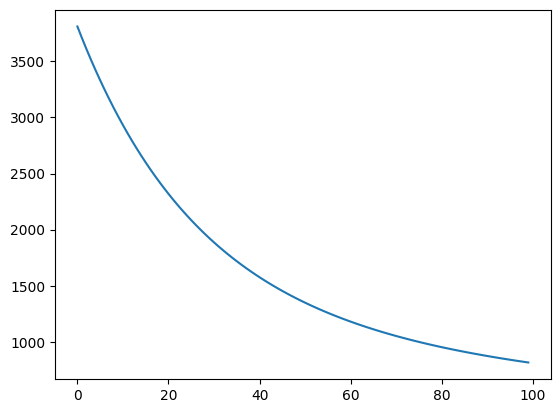

In [25]:
# # convertir la historia de los datos de entrenamiento a un dataframe
history_df = pd.DataFrame(history2.history)
# usando Pandas para gráficar
history_df['loss'].plot();

In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
score

1184.32861328125

Tarea

In [3]:
#Usando uno de los datasets disponibles desde sklearn podemos obtener datos
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target

In [4]:
#10 atributos y 442 valores
X.shape

(442, 10)

In [5]:
Y.shape

(442,)

In [6]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

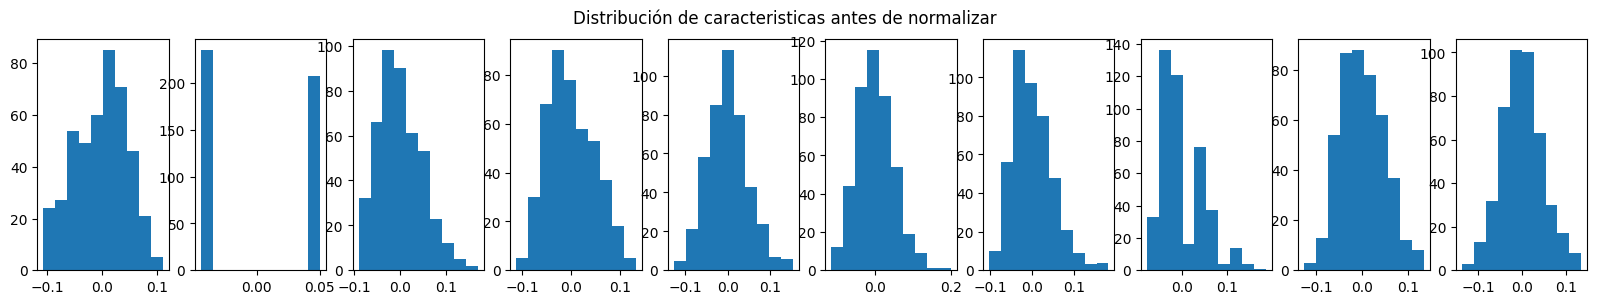

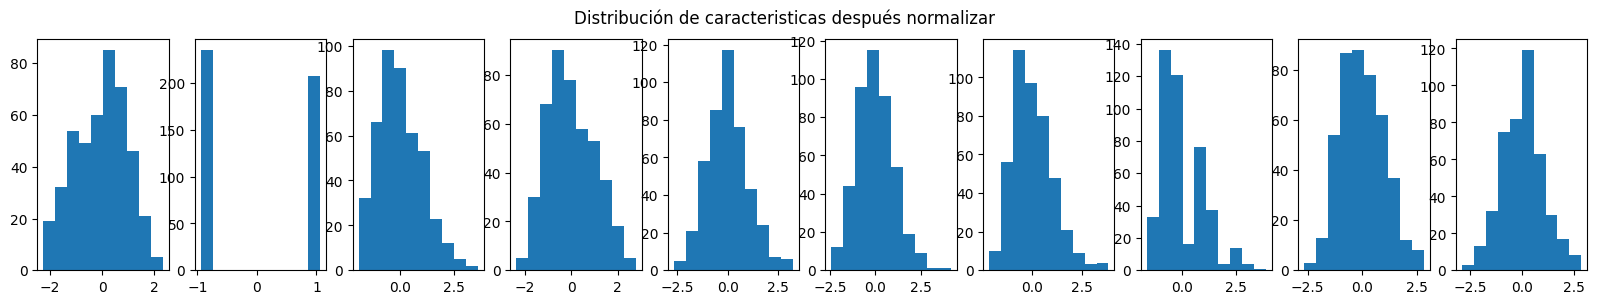

In [7]:
fig,ax=plt.subplots(1, 10,  figsize=(20, 3))
for i in range(len(ax)):
    ax[i].hist(X[:,i])
fig.suptitle("Distribución de caracteristicas antes de normalizar ")
plt.show()

fig,ax=plt.subplots(1, 10, figsize=(20, 3))
for i in range(len(ax)):
    ax[i].hist(X_norm[:,i])
fig.suptitle("Distribución de caracteristicas después normalizar ")
plt.show()

In [8]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(X_norm, Y)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant')
number of iterations completed: 8, number of weight updates: 3537.0


In [9]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [148.62025104], b:[ -2.60521853 -12.88397771  21.3944571   11.19946353 -11.95345477
   2.47742473  -7.62342091   7.38335297  25.2759081    3.01403734]


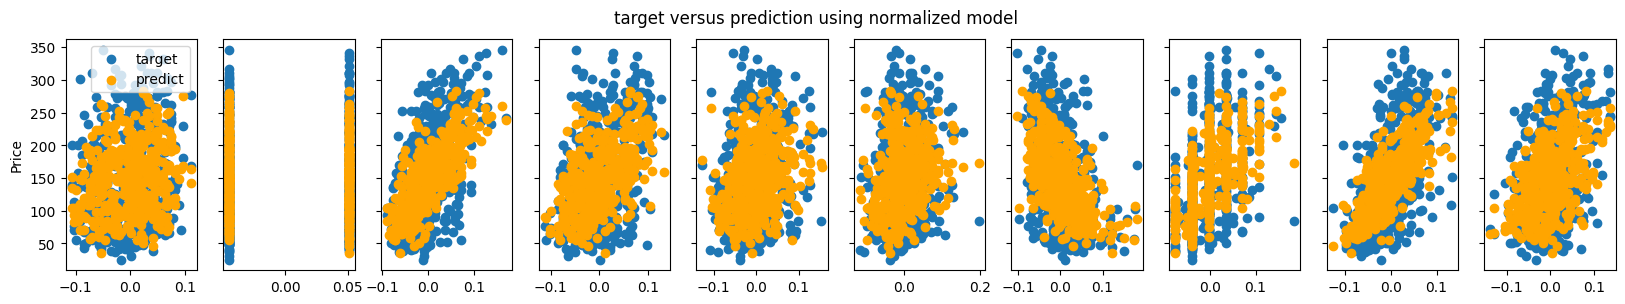

In [10]:
#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*X_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,10,figsize=(20, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],Y, label = 'target')
    ax[i].scatter(X[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.30, random_state=42)

In [12]:
sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 10, number of weight updates: 3091.0


In [13]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [151.07017866], b:[  4.97596984 -11.2434975   24.76769075  21.30589522 -12.51076978
   1.14738939  -5.78290949   6.543137    17.26989233   5.80648733]


In [14]:
sgdr.score(X_test,y_test)

0.458042027428349

In [19]:
input_dim = 10
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 11 (44.00 Byte)
Trainable params: 11 (44.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
num_epochs = 100
batch_size =X_train.shape[0] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 29851.7500
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 28438.6270
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 27133.4805
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 25924.1035
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 24799.9922
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 23752.0879
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 22772.5703
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 21854.6562
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 20992.4688
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 20180.8828
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 19415.4180
Epoch 12/100
1/1 [==============================] - 0s 15ms/step - loss: 18692.1641
Epoc

In [21]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[  2.293228 ]
 [ -9.639476 ]
 [ 25.829731 ]
 [ 15.672987 ]
 [ -3.3323712]
 [ -5.1110854]
 [-10.364343 ]
 [  6.9841776]
 [ 15.4412   ]
 [  7.278337 ]] [130.87158]


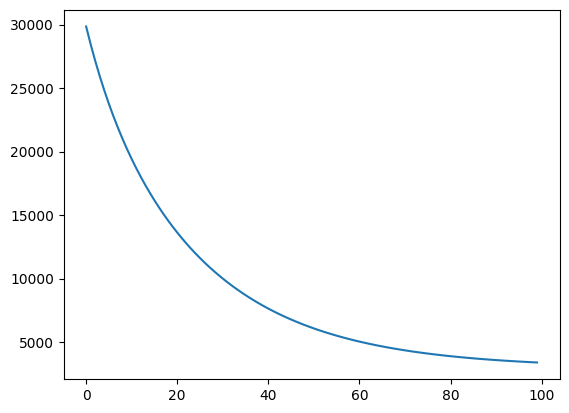

In [22]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();

In [23]:
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 12ms/step - loss: 3375.7883
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 3359.4250
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 3343.7041
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 3328.5989
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 3314.0867
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 3300.1418
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 3286.7434
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 3273.8696
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 3261.4998
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 3249.6135
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 3238.1912
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 3227.2153
Epoch 13/100
1/1 [===

In [24]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[  1.7000206]
 [-11.606994 ]
 [ 27.07486  ]
 [ 17.123096 ]
 [ -4.7493453]
 [ -5.412557 ]
 [-10.919963 ]
 [  7.4460225]
 [ 16.429863 ]
 [  4.1163015]] [148.15993]


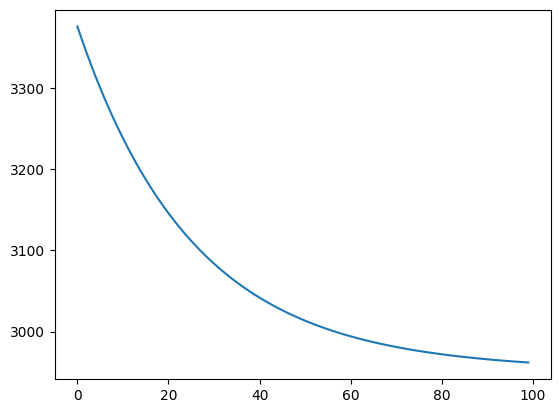

In [25]:
history_df = pd.DataFrame(history2.history)
history_df['loss'].plot();

In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
score

2848.87353515625